In [2]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.write_html("file.html")

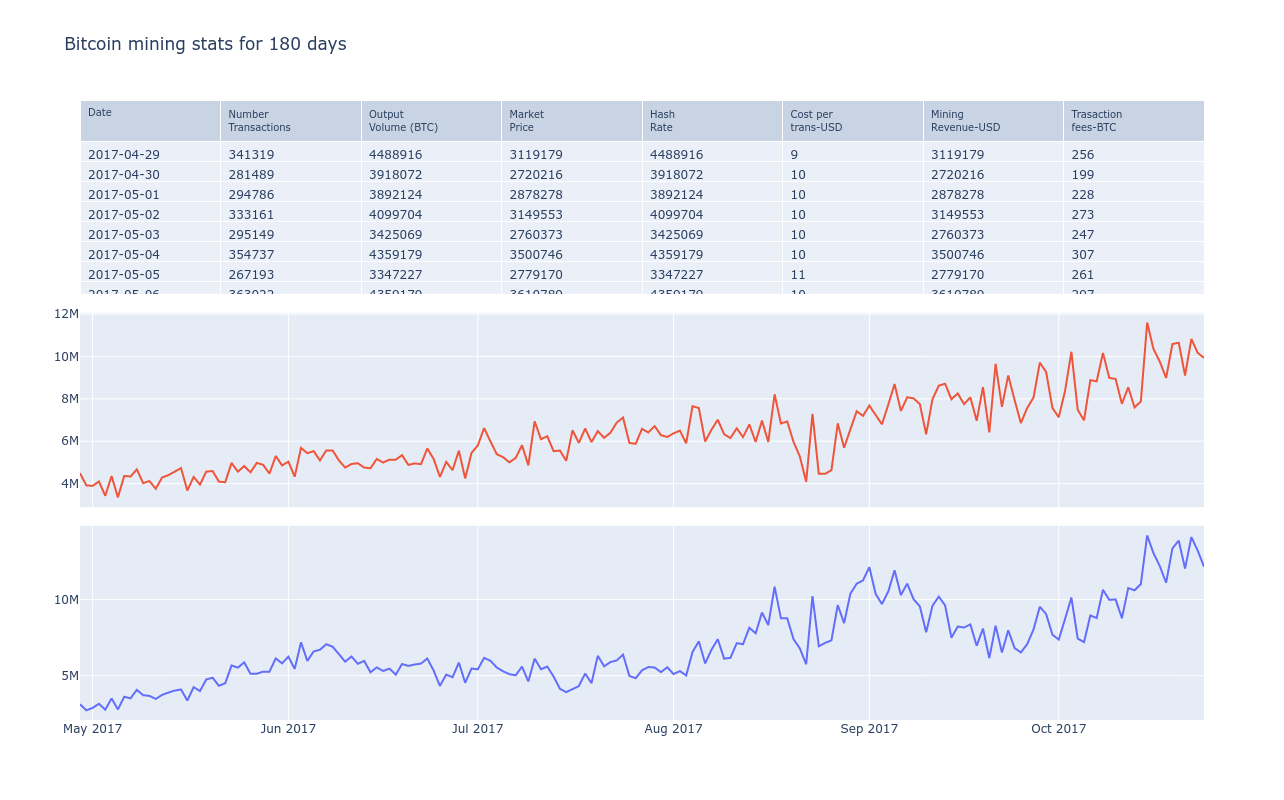

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

for i, row in enumerate(df["Date"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(df["Date"][i])[0]
    df.iloc[i, 1] = datetime

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Mining-revenue-USD"],
        mode="lines",
        name="mining revenue"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Hash-rate"],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Number<br>Transactions", "Output<br>Volume (BTC)",
                    "Market<br>Price", "Hash<br>Rate", "Cost per<br>trans-USD",
                    "Mining<br>Revenue-USD", "Trasaction<br>fees-BTC"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[1:]],
            align = "left")
    ),
    row=1, col=1
)
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Bitcoin mining stats for 180 days",
)

fig.show()

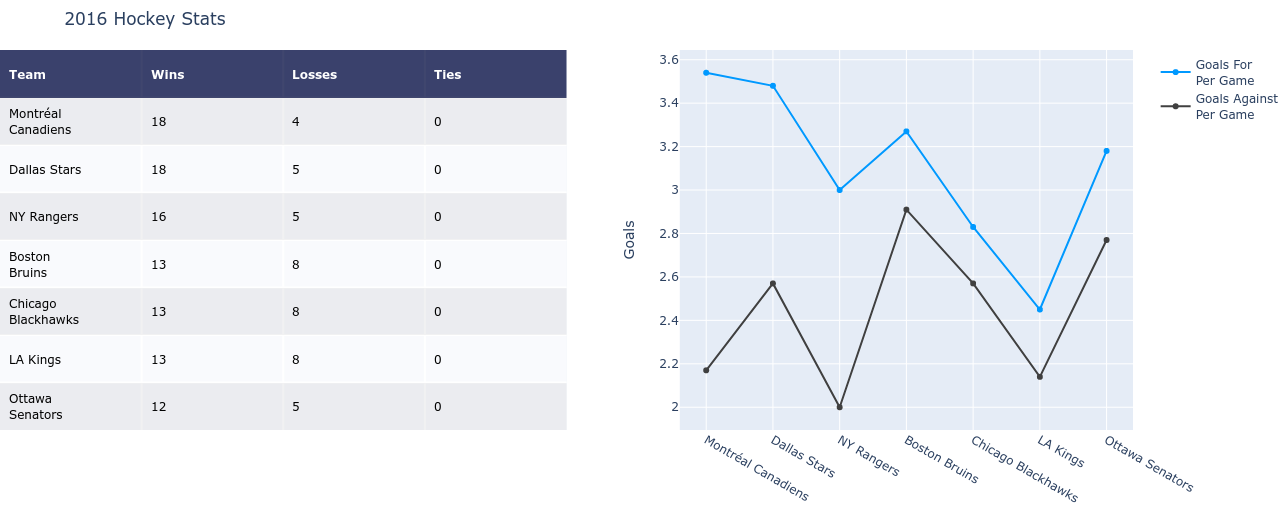

In [4]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

table_data = [['Team', 'Wins', 'Losses', 'Ties'],
              ['Montréal<br>Canadiens', 18, 4, 0],
              ['Dallas Stars', 18, 5, 0],
              ['NY Rangers', 16, 5, 0],
              ['Boston<br>Bruins', 13, 8, 0],
              ['Chicago<br>Blackhawks', 13, 8, 0],
              ['LA Kings', 13, 8, 0],
              ['Ottawa<br>Senators', 12, 5, 0]]

fig = ff.create_table(table_data, height_constant=60)

teams = ['Montréal Canadiens', 'Dallas Stars', 'NY Rangers',
         'Boston Bruins', 'Chicago Blackhawks', 'LA Kings', 'Ottawa Senators']
GFPG = [3.54, 3.48, 3.0, 3.27, 2.83, 2.45, 3.18]
GAPG = [2.17, 2.57, 2.0, 2.91, 2.57, 2.14, 2.77]

trace1 = go.Scatter(x=teams, y=GFPG,
                    marker=dict(color='#0099ff'),
                    name='Goals For<br>Per Game',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=teams, y=GAPG,
                    marker=dict(color='#404040'),
                    name='Goals Against<br>Per Game',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': '2016 Hockey Stats'})

fig.show()